In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [180]:
data = pd.read_csv("train.csv")

In [181]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [182]:
def is_numeric_column(column):
    try:
        pd.to_numeric(column, errors='raise')
        return True
    except ValueError:
        return False
def prepare_data(data):
    data.drop(['Alley'], axis=1,inplace=True)
    data.drop(['FireplaceQu'], axis=1,inplace=True)
    data.drop(['PoolQC'], axis=1,inplace=True)
    data.drop(['Fence'], axis=1,inplace=True)
    data.drop(['MiscFeature'], axis=1,inplace=True)
    data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
    data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
    data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])
    data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
    data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
    data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
    data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
    data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
    data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
    data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
    data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])
    
def prepare_data_auto(data):
    data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
    data.drop(['Alley'], axis=1,inplace=True)
    data.drop(['FireplaceQu'], axis=1,inplace=True)
    data.drop(['PoolQC'], axis=1,inplace=True)
    data.drop(['Fence'], axis=1,inplace=True)
    data.drop(['MiscFeature'], axis=1,inplace=True)
    for column in data.columns:
        if data[column].isnull().sum()>0:
            data[column] = data[column].fillna(data[column].mode()[0])
        if not is_numeric_column(data[column]):
            unique_values=data[column].unique()
            values_dict={}
            index=0
            for i in unique_values:
                values_dict[i]=index
                index+=1
            data[column]=data[column].map(values_dict)
        elif column!='SalePrice':
            max_value = data[column].max()
            data[column] = data[column]/max_value

In [183]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [184]:
prepare_data_auto(data)
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [185]:
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000685,0.315789,0,0.207668,0.039258,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.999005,0,0,208500
1,0.001370,0.105263,0,0.255591,0.044600,0,0,0,0,1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.416667,0.998507,0,0,181500
2,0.002055,0.315789,0,0.217252,0.052266,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.750000,0.999005,0,0,223500
3,0.002740,0.368421,0,0.191693,0.044368,0,1,0,0,2,...,0.492754,0.000000,0.000000,0.0,0.000000,0.166667,0.998010,0,1,140000
4,0.003425,0.315789,0,0.268371,0.066250,0,1,0,0,1,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.999005,0,0,250000
5,0.004110,0.263158,0,0.271565,0.065576,0,1,0,0,0,...,0.000000,0.629921,0.000000,0.0,0.045161,0.833333,0.999502,0,0,143000
6,0.004795,0.105263,0,0.239617,0.046849,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.998507,0,0,307000
7,0.005479,0.315789,0,0.223802,0.048233,0,1,0,0,2,...,0.413043,0.000000,0.000000,0.0,0.022581,0.916667,0.999502,0,0,200000
8,0.006164,0.263158,1,0.162939,0.028433,0,0,0,0,0,...,0.371377,0.000000,0.000000,0.0,0.000000,0.333333,0.999005,0,1,129900
9,0.006849,1.000000,0,0.159744,0.034472,0,0,0,0,2,...,0.000000,0.000000,0.000000,0.0,0.000000,0.083333,0.999005,0,0,118000


In [186]:
train_target = data['SalePrice']
train_data = data.drop(['Id','SalePrice'], axis=1)

In [187]:
model = RandomForestRegressor()

In [188]:
model.fit(train_data, train_target)

RandomForestRegressor()

In [189]:
test_data = pd.read_csv("test.csv")
test_target = pd.read_csv("sample_submission.csv")

In [190]:
prepare_data_auto(test_data)
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [191]:
test_data=test_data.drop(['Id'], axis=1)
test_target=test_target['SalePrice']

In [192]:
prediction = model.predict(test_data)
for i in range(0,30):
    print(prediction[i])

135987.75
174073.65
199085.24
209140.41
224520.23
195683.35
162864.7
183806.6
217584.03
139316.25
237423.81
110375.04
117591.37
166823.5
143526.55
345224.91
259057.33
300331.7
290598.56
393465.11
330283.21
225450.54
180962.49
183080.14
177456.27
222061.6
336165.68
264494.63
203538.45
193451.0


In [193]:
diviation = []
for i in range(0,len(prediction)):
    diviation.append(abs(prediction[i]-test_target[i]))
mean_div = sum(diviation)/len(diviation)
print(mean_div)

51919.48342165171


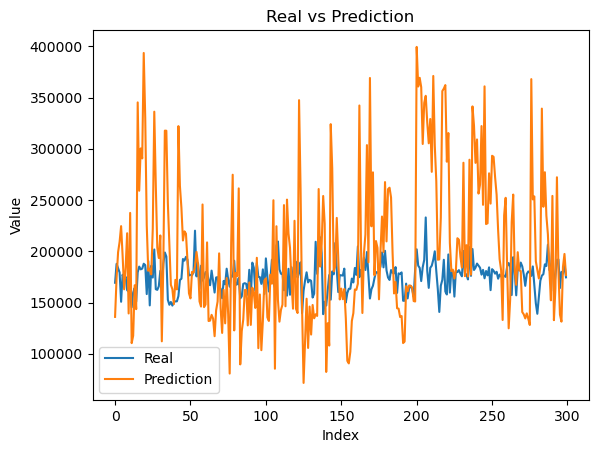

In [195]:
plt.plot(test_target[0:300], label='Real')
plt.plot(prediction[0:300], label='Prediction')

# Добавляем легенду
plt.legend()

# Добавляем название осей
plt.xlabel('Index')
plt.ylabel('Value')

# Добавляем заголовок графика
plt.title('Real vs Prediction')

# Показываем график
plt.show()